###Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install sacremoses
!pip install data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.0 MB/s 
     |████████████████████████████████| 7.6 MB 56.2 MB/s 
     |████████████████████████████████| 163 kB 91.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 5.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=d6b986160831f1288c018638caa54ce4e71b5c1ce18758415884c6c84890b559
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7247 sha256=89a3ed1396278ae97a93a897917e257b3e33992a119648ca46f4d65548af1c94
  Stored in directory: /root/.cac

In [ ]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf
import re
from torch import nn
import torch.nn.functional as F
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from transformers import *
from data import *

In [ ]:
import time
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
!pip install -q tensorflow_text|

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
!pip install -q tf-models-official

     |████████████████████████████████| 2.2 MB 5.3 MB/s 
     |████████████████████████████████| 578.0 MB 14 kB/s 
     |████████████████████████████████| 38.2 MB 1.4 MB/s 
     |████████████████████████████████| 99 kB 11.4 MB/s 
     |████████████████████████████████| 116 kB 75.6 MB/s 
     |████████████████████████████████| 352 kB 98.2 MB/s 
     |████████████████████████████████| 238 kB 93.3 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.3 MB 71.9 MB/s 
     |████████████████████████████████| 5.9 MB 52.7 MB/s 
     |████████████████████████████████| 636 kB 92.5 MB/s 
     |████████████████████████████████| 1.1 MB 74.1 MB/s 
     |████████████████████████████████| 5.9 MB 55.1 MB/s 
     |████████████████████████████████| 438 kB 88.7 MB/s 
     |████████████████████████████████| 1.7 MB 62.9 MB/s 


In [ ]:
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
# import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow.keras.backend as K
from scipy.stats import spearmanr
from math import floor, ceil
from transformers import *

np.set_printoptions(suppress=True)
print(tf.__version__)

import shutil

from official.nlp import optimization  # to create AdamW optmizer

tf.get_logger().setLevel('ERROR')

AttributeError: ignored

In [ ]:
from tensorflow.keras.models import load_model,save_model

### Preprocessing Functions

In [ ]:
# Normalizing the domain1_score
def normalize_value(score, min_value, max_value):
  result =  tf.compat.v1.div(float(tf.subtract(score, min_value)), float(tf.subtract(max_value, min_value)))
  return result

In [ ]:
# taking care of NEC
def clean_nec(essay):
    essay = re.sub(r"@[A-Za-z0-9]+", ' ', essay)
    essay = re.sub(r"https?://[A-Za-z0-9./]+", ' ', essay)
    #essay = re.sub(r"[^a-zA-Z.!?']", ' ', essay)
    essay = re.sub(r" +", ' ', essay)
    return essay

###Loading Dataset

In [ ]:
PATH = "/content/drive/MyDrive/Colab Notebooks/AES/New_CNN_and_MLP"
#Loading the dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/AES/training_set_rel3.tsv"
df = pd.read_csv(dataset_path, sep="\t", encoding="ISO-8859-1")
min_scores = [2, 1, 0, 0, 0, 0, 0, 0]
max_scores = [12, 6, 3, 3, 4, 4, 30, 60]
df.dropna(axis=1, inplace=True)
df.drop(columns=["rater1_domain1", "rater2_domain1"], inplace=True)
df['normalized_score'] = df.apply(lambda x: float(normalize_value(x['domain1_score'], min_scores[x['essay_set']-1], max_scores[x['essay_set']-1])), axis=1)
df.head()

In [ ]:
df['essay'] = df['essay'].apply(lambda x: clean_nec(x))

In [ ]:
df.iloc[68]['essay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.essay, df.normalized_score, test_size=0.15, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42) # 0.1765 x 0.85 = 0.15

In [ ]:
X_train.to_csv(PATH+"/X_train.csv")
y_train.to_csv(PATH+"/y_train.csv")
X_test.to_csv(PATH+"/X_test.csv")
y_test.to_csv(PATH+"/y_test.csv")
# X_val.to_csv(PATH+"/X_val.csv")
# y_val.to_csv(PATH+"/y_val.csv")

In [ ]:
print('X train Shape: ', X_train.shape)
print('y train Shape: ', y_train.shape)
print('X test Shape: ', X_test.shape)
print('y test Shape: ', y_test.shape)
# print('X val Shape: ', X_val.shape)
# print('y val Shape: ', y_val.shape)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [ ]:
#bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 
bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/1',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    tt1 = np.around(10*y_pred)
    tt2 = tt1.reshape(tt1.shape[0],)
    pred_values = tt2.astype(int)
    tt3 = np.array(10* y_test)
    gold_values = tt3.astype(int)
    # evaluate the model
    result = cohen_kappa_score(gold_values,pred_values,weights='quadratic')
    print("Kappa Score: {}".format(result))
    yy_p = y_pred.reshape(y_pred.shape[0],)
    yy_t = np.array(y_test)
    MSE = np.square(np.subtract(yy_t, yy_p)).mean()
    RMSE = math.sqrt(MSE)
    print ("MSE: ", MSE)
    print ("RMSE: ", RMSE)

###MLP Regression Model

In [ ]:
# def process_bert_embeddings(encoder_input):


In [ ]:
def build_regression_model(output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        #print(output_bias)
        
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = tf.math.add_n(outputs['encoder_outputs'][-4:])
    net = tf.keras.layers.Flatten()(net)
    net = tf.keras.layers.Dense(4096, activation="relu")(net)
    net = tf.keras.layers.Dropout(0.5)(net)
    net = tf.keras.layers.Dense(2048, activation="relu")(net)
    net = tf.keras.layers.Dropout(0.2)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    # net = tf.keras.layers.Dense(3, activation="softmax", name='classifier', bias_initializer=output_bias)(net)
    net = tf.keras.layers.Dense(1, activation="relu", name='regression', bias_initializer=output_bias)(net)

    return tf.keras.Model(text_input, net)

In [ ]:
text_test = ['this is such an amazing movie!']

In [ ]:
regression_model = build_regression_model()
bert_raw_result = regression_model(tf.constant(text_test))
print(bert_raw_result)

KeyboardInterrupt: ignored

In [ ]:
regression_model.get_weights()[-1]

In [ ]:
regression_model.summary()

In [ ]:
tf.keras.utils.plot_model(regression_model)

In [ ]:
loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metrics = tf.keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None)

In [ ]:
epochs = 80
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
regression_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = regression_model.fit(X_train, y_train,
                               epochs=epochs, validation_split=0.15
                               )

In [ ]:
regression_model.save("/content/drive/MyDrive/Colab Notebooks/AES/New_CNN_and_MLP/MLP_model_fullbert_withL4hs_2048", include_optimizer=False)

In [ ]:
regression_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/AES/New_CNN_and_MLP/MLP_model_fullbert_withL4hs_2048")

In [ ]:
loss, accuracy = regression_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

In [ ]:
evaluate_model(regression_model,X_test,y_test)

##BERT + CNN

In [ ]:
class CNNBert(nn.Module):
    
    def __init__(self, embed_size, bert_model):
        super(CNNBert, self).__init__()
        filter_sizes = [1,2,3,4,5]
        num_filters = 32
        self.convs1 = nn.ModuleList([nn.Conv2d(4, num_filters, (K, embed_size)) for K in filter_sizes])
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(len(filter_sizes)*num_filters, 1)
        self.sigmoid = nn.Sigmoid()
        self.bert_model = bert_model

    def forward(self, x, input_masks, token_type_ids):
        x = self.bert_model(x, attention_mask=input_masks, token_type_ids=token_type_ids)[2][-4:]
        x = torch.stack(x, dim=1)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1] 
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  
        x = torch.cat(x, 1)
        x = self.dropout(x)  
        logit = self.fc1(x)
        return self.sigmoid(logit)

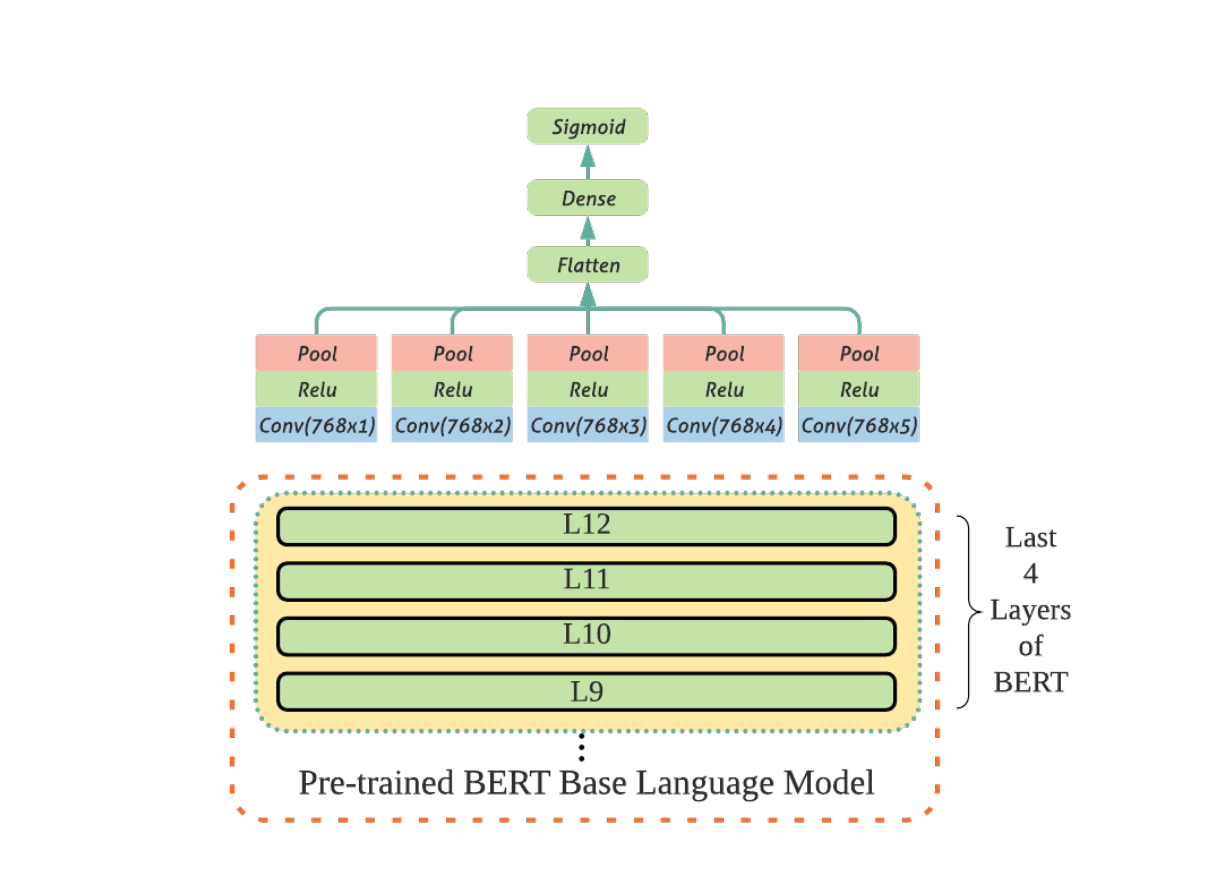

In [ ]:
from transformers import BertModel, BertConfig, BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained('bert-base-uncased', output_hidden_states=True)
bert_model = BertModel.from_pretrained('bert-base-uncased', config=config)

model = CNNBert(768, bert_model)

In [ ]:
tokenize_sentence = tokenizer.encode('hello this is a test',add_special_tokens=True,padding='max_length', max_length=512, truncation=True)
tt = torch.tensor(tokenize_sentence)
tts = tt.reshape(1,len(tt))
# getting the 2nd last layer

In [ ]:
output = bert_model(tts)

In [ ]:
output[2][-1].shape

In [ ]:
from torchsummary import summary

summary(model)

In [ ]:
text_input = ['this is a test']
preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)
encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
# keeping the last 4 hidden states from BERT
outputs = encoder(encoder_inputs)['encoder_outputs'][-4:]


In [ ]:
res_outputs = [tf.reshape(t, (t.shape[0],t.shape[1],t.shape[2],1)) for t in outputs]

In [ ]:
res_outputs[0].shape

TensorShape([1, 128, 768, 1])

In [ ]:
outputs[0].shape

TensorShape([1, 128, 768])

In [ ]:
conc = tf.keras.layers.concatenate(res_outputs, axis=3)

In [ ]:
conc.shape

TensorShape([1, 128, 768, 4])

In [ ]:
outputs[0].shape

In [ ]:
def build_CNN_regression_model_2D():
    filter_sizes = [1,2,3,4,5]
    num_filters = 32
    embed_size = 768

    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    # keeping the last 4 hidden states from BERT
    outputs = encoder(encoder_inputs)['encoder_outputs'][-4:]
    res_outputs = [tf.keras.layers.Reshape((-1,t.shape[1],t.shape[2],1))(t) for t in outputs]
    # net = tf.math.add_n(outputs['encoder_outputs'][-4:])
    net = tf.keras.layers.concatenate(res_outputs, axis=3)

    # creating list of 5 CNN layers
    conv_layers = [tf.keras.layers.Conv2D(num_filters, (K, embed_size), activation='relu', data_format='channels_last', name='conv_layer_%d'%K)(net) for K in filter_sizes]

    # max pooling outputs from each conv sequence
    pooled = [tf.squeeze(tf.keras.layers.MaxPooling1D(pool_size=c_layer.shape[2],name='max_pool'), 2)(c_layer) for c_layer in conv_layers]

    net = tf.keras.layers.concatenate(pooled, axis=1)
    net = tf.keras.layers.Dropout(0.1)(net)

    net = tf.keras.layers.Dense(1, activation="relu", name='regressor')(net)
    
    return tf.keras.Model(text_input, net)

In [ ]:
def build_CNN_regression_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    #net = outputs['pooled_output'] # [batch_size, 768].
    # net = sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 768]
    net = tf.math.add_n(outputs['encoder_outputs'][-4:])
    # net = tf.keras.layers.Conv1D(16, (2), activation='relu')(net)
    net = tf.keras.layers.Conv1D(32, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    
    net = tf.keras.layers.Conv1D(64, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    net = tf.keras.layers.GlobalMaxPool1D()(net)
    
#    net = tf.keras.layers.Flatten()(net)
    
    net = tf.keras.layers.Dense(512, activation="relu")(net)
    
    net = tf.keras.layers.Dropout(0.1)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(1, activation="relu", name='regressor')(net)
    
    return tf.keras.Model(text_input, net)

In [ ]:
text_test = ['this is such an amazing movie!']

In [ ]:
cnn_regression_model = build_CNN_regression_model_2D()
bert_raw_result = cnn_regression_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

ValueError: ignored

In [ ]:
cnn_regression_model.summary()

In [ ]:
tf.keras.utils.plot_model(cnn_regression_model)

In [ ]:
epochs = 80
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

cnn_regression_model.compile(optimizer=optimizer,
                             loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
                             metrics = tf.keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None))

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
cnn_history = cnn_regression_model.fit(X_train, y_train,
                               epochs=epochs, validation_split=0.15
                               )

In [ ]:
save_model(cnn_regression_model, "/content/drive/MyDrive/Colab Notebooks/AES/New_CNN_and_MLP/cnn_model_fullbert_finetune_2-layer_cnn_l4hs_rerun.h5", include_optimizer=False)

In [ ]:
#cnn_regression_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/AES/New_CNN_and_MLP/cnn_model_fullbert_finetune_2-layer_cnn_l4hs")
cnn_regression_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/AES/New_CNN_and_MLP/cnn_model_fullbert_finetune_2-layer_cnn_l4hs_rerun.h5")

In [ ]:
history_dict = cnn_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# acc = history_dict['binary_accuracy']
# val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
evaluate_model(cnn_regression_model, X_test, y_test)

NameError: ignored